### Last name: Khambanonda
### First name: Yanisa
### Student number: 1003883005
### List of collaborators (if any): 
* Last name, first name
* Last name, first name
* Last name, first name

In this exercise prepared by me (Mohannad Shehadeh), I'll be demonstrating the power of projections through a variety of examples. The purpose of the exercise is for you to see how much you can do using just the basic tools that you already know as well as to motivate the upcoming material in the course. The hope is that very soon, you'll come across a problem where you can apply the techniques illustrated in this exercise to do something cool. I'll assume that you're familiar with most of the ideas already, but I'll briefly review the basic facts that you should keep in mind as you go through the exercise. If any of them seem unfamiliar or don't make sense to you, I recommend you spend some time studying your lecture notes or textbook first, or reviewing your linear algebra. If you complete and understand Parts 1 and 2, Parts 3 and 4 can be completed by pretty much copying and pasting your code, so be sure to take your time to understand fully the first parts. There's very little code to write beyond implementing the Gram-Schmidt procedure which itself should only take a few lines of code. Moreover, you should be sure to understand fully the examples in Part 0 since you can reuse the code from the examples to do almost everything you'll need to do in the exercise.

# Part 0: Preliminaries

We'll start by reviewing some facts and terminology that I'll be using:
- A vector space, or a subspace of a vector space, can be represented as the span of a collection of vectors, perhaps the columns of some matrix $\mathbf V$
- These vectors may or may not be linearly independent
- If these vectors are linearly independent, they are called a basis for that subspace and every vector $\mathbf x$ in that subspace can be represented uniquely as a linear combination of these vectors, i.e., the columns of $\mathbf V$
- If $\mathbf b$ is a vector of the coefficients of this linear combination $\mathbf x = \mathbf V \mathbf b$
- If the columns of $\mathbf V$ are a basis for some subspace of higher dimensional space, in which case $\mathbf V$ is a tall matrix, a vector $\mathbf x$ in this higher dimensional space can be projected onto the span of the columns of $\mathbf V$
- The projection $\mathbf{\hat x}$ can then be represented as $\mathbf{\hat x} = \mathbf V \mathbf b$ for some lower dimensional vector $\mathbf b$
- The projection $\mathbf{\hat x}$ will be the closest (in Euclidean distance) vector to $\mathbf x$ which lives the subspace spanned by the columns of $\mathbf V$
- In this case $\mathbf b$ will be refered to either as the "projection coefficients" or the "representation of the projection in terms of $\mathbf V$" and will provide a lower dimensional representation of $\mathbf x$
- $\mathbf{\hat x}$ is of the same size as $\mathbf x$, but, given $\mathbf V$ we can reproduce $\mathbf{\hat x}$ using a lower dimensional vector $\mathbf b$ so we are sometimes just interested in the lower dimensional representation $\mathbf b$
- Suppose, for example, we wish to compare many high dimensional $\mathbf x$. Once projected onto an appropriate subspace, we can instead compare the corresponding lower dimensional $\mathbf b$ vectors.
- The projection becomes very easy to compute when we have an orthonormal basis for our subspace. 
- An orthonormal basis is a basis (a linearly independent set), in which the vectors are orthogonal and normalized to have a norm of $1$ each
- If a collection of vectors is orthogonal, then they are also linearly independent. Therefore, any orthogonal set of vectors is a basis for the subspace they span
- Given any collection of vectors, whether or not they are a basis, we can construct an orthonormal basis for their span using the Gram-Schmidt procedure
- Once we have an orthonormal basis $\{\mathbf{w_1}, \dots, \mathbf{w_m}\}$ for our subspace spanned by the columns of $\mathbf V$, we can have the basis vectors be the columns of some matrix $\mathbf W$. 
- If we want to project $\mathbf x$ onto the span of the columns of $\mathbf W$ which is equal to the span of the columns of $\mathbf V$, the projection coefficients $\mathbf a$ are simply 
\begin{equation}
    \mathbf{a} = \begin{bmatrix}
    \langle \mathbf{w_1}, \mathbf{x} \rangle \\
    \langle \mathbf{w_2}, \mathbf{x} \rangle \\
    \vdots\\
    \langle \mathbf{w_m}, \mathbf{x} \rangle \\
    \end{bmatrix}
    = \mathbf{W^T}\mathbf x
\end{equation}
- Therefore, we have $\mathbf{\hat x} = \mathbf W \mathbf a = \mathbf W \mathbf{W^T} \mathbf x$
- If the columns of $\mathbf V$ were also a basis (linearly independent), then we can also find a $\mathbf b$ the same size as $\mathbf{a}$, but different, such that $\mathbf{\hat x} = \mathbf W \mathbf a = \mathbf W \mathbf{W^T} \mathbf x = \mathbf V \mathbf b$
- In this case, $\mathbf a$ is the representation of the projection in our orthonormal basis, and $\mathbf b$ is the representation of the projection in our non-orthogonal, non-orthonormal basis
- If the the columns of $\mathbf V$ are not a basis (they are linearly dependent), then certainly we can represent a projection onto their span as $\mathbf{\hat x} = \mathbf V \mathbf b$, but the $\mathbf b$ will not be unique so we do not talk of it as a "representation." If we would like to talk about "representations," we'll need to find a basis, or an orthonormal basis for that span

Let's begin. Be sure to:
- Run all cells
- Remove semicolons if you'd like to see the output of a cell where I've placed a semicolon
- Use the variable names I specify in the questions

Also, I'll repeat again that the examples I provide in this part are super important and provide almost all of the code you'll need to write, so be sure to understand the preliminaries before moving on.

In [1]:
using Plots
using LinearAlgebra
using DelimitedFiles

In order to make the code you write more elegant and simple, we'll represent a collection of vectors in two ways:
- As a matrix whose columns are those vectors
- As a vector of vectors whose entires are those vectors

You can use the matrix representation when doing matrix calculations, and the vector of vectors representation when constructing a basis.

For your convenience, I've provided two functions for going back and forth between those representations and some examples

In [2]:
function toMatrix(V)
    return [V[j][i] for i in 1:length(V[1]), j in 1:length(V)]
end

toMatrix (generic function with 1 method)

In [3]:
function toVecOfVecs(V_)
    return [V_[:,i] for i in 1:size(V_)[2]]
end

toVecOfVecs (generic function with 1 method)

We create an orthonormal basis for some subspace of $\mathbf R^3$ as a collection of vectors

In [4]:
W = [[1/sqrt(2),0,1/sqrt(2)], [0,1,0]] # Vector whose entries are two vectors

2-element Array{Array{Float64,1},1}:
 [0.7071067811865475, 0.0, 0.7071067811865475]
 [0.0, 1.0, 0.0]                              

In [5]:
W[1] # Gives the first vector in the basis

3-element Array{Float64,1}:
 0.7071067811865475
 0.0               
 0.7071067811865475

In [6]:
W[2] # Gives the second vector in the basis

3-element Array{Float64,1}:
 0.0
 1.0
 0.0

In [7]:
W[1][3] # Gives the third component of the first vector in the basis

0.7071067811865475

We use the convention that an underscore ```_``` denotes the matrix version of the collection of vectors:

In [8]:
W_ = toMatrix(W) # The vectors in W occur as the columns of W_

3×2 Array{Float64,2}:
 0.707107  0.0
 0.0       1.0
 0.707107  0.0

In [9]:
W_[:,2] # Second column/vector

3-element Array{Float64,1}:
 0.0
 1.0
 0.0

The matrix $\mathbf{W^TW}$ has entry $i,j$ corresponding to the dot product of $i^\textrm{th}$ and $j^\textrm{th}$ column of $\mathbf W$ so should be diagonal if they are orthogonal and identity if they are orthonormal. You can use this as a quick sanity check:

Recall that ```'``` is the transpose (actually conjugate transpose, but everything is real so it's just the transpose)

In [10]:
W_'*W_ # Should be identity if W is an orthonormal basis

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

Note that due to floating point errors, you won't get exactly identity. Instead of zeros, you might just get really small numbers like $10^{-15}$

In [11]:
toVecOfVecs(W_) # This converts to the vector of vectors representation

2-element Array{Array{Float64,1},1}:
 [0.7071067811865475, 0.0, 0.7071067811865475]
 [0.0, 1.0, 0.0]                              

In [12]:
toVecOfVecs(W_) == W # Should be a true statement

true

Since the columns of $\mathbf W$ are an orthonormal basis, the representation of the projection of some $\mathbf{x}$ onto the span of the columns of $\mathbf W$ can be obtained as $\mathbf a = \mathbf{W^T}\mathbf x$ and the projection is $\mathbf{\hat x} = \mathbf W \mathbf a$

Let's consider projecting 
$$
\mathbf x = \begin{bmatrix}
5\\
3\\
5
\end{bmatrix}
$$
which is in the span of the columns of $\mathbf W$ so its projection should be itself.

In [13]:
x = [5,3,5]

3-element Array{Int64,1}:
 5
 3
 5

In [14]:
a = [dot(w,x) for w in W] # One option

2-element Array{Float64,1}:
 7.071067811865475
 3.0              

In [15]:
a = W_'*x # Second option, should be same output as above

2-element Array{Float64,1}:
 7.071067811865475
 3.0              

The two cells above compute the exact same thing, a matrix-vector product

In [16]:
x_hat = W_*a # Projection

3-element Array{Float64,1}:
 4.999999999999999
 3.0              
 4.999999999999999

This should be the same as the original $\mathbf x$ (with the exception of a tiny difference due to floating point error)

In [17]:
norm(x-x_hat) # Should be a very tiny number

1.2560739669470201e-15

Let's now consider projecting a vector which is not in the span, so the projection should only approximate it.

Let
$$
\mathbf x = \begin{bmatrix}
5\\
3\\
7
\end{bmatrix}
$$

In [18]:
x = [5,3,7]

3-element Array{Int64,1}:
 5
 3
 7

In [19]:
a = W_'*x

2-element Array{Float64,1}:
 8.48528137423857
 3.0             

In [20]:
x_hat = W_*a

3-element Array{Float64,1}:
 5.999999999999999
 3.0              
 5.999999999999999

In [21]:
norm(x-x_hat) 

1.4142135623730951

To check your answers, we provide a function which computes the projection of a vector ```v``` onto the span of any collection of vectors (vector of vectors) ```V``` regardless of whether or not the set is a basis, or is an orthonormal basis. 
- You are not expected to understand what this function is doing for this exercise and at this stage in the course
- You can only use it to check your answers, when you compute projections, you must do it by obtaining an orthonormal basis and doing what we did above
- It doesn't provide you with the projection coefficients, so you can't use it to check all of your answers, only the projection itself

In [22]:
function projGeneral(v,V) # Computes projection of v onto Span(V) where V is a vector of vectors
    V = toMatrix(V)
    Q, R = qr(V)
    Q = Q[:,1:rank(V)]
    return Q*inv(Q'*Q)*Q'*v
end

projGeneral (generic function with 1 method)

We'll demonstrate the use of this function in the following examples:

In [23]:
projGeneral(x, W) # This should be the same answer you got for x_hat before

3-element Array{Float64,1}:
 6.0
 3.0
 6.0

Let's consider augmenting our basis so that our vector $$
\mathbf x = \begin{bmatrix}
5\\
3\\
7
\end{bmatrix}$$
is in it.

In [24]:
W = [[1/sqrt(2),0,1/sqrt(2)], [0,1,0]] # This is our current W

2-element Array{Array{Float64,1},1}:
 [0.7071067811865475, 0.0, 0.7071067811865475]
 [0.0, 1.0, 0.0]                              

In [25]:
push!(W, [-3,0,1]) # Put this vector into our basis

3-element Array{Array{Float64,1},1}:
 [0.7071067811865475, 0.0, 0.7071067811865475]
 [0.0, 1.0, 0.0]                              
 [-3.0, 0.0, 1.0]                             

In [26]:
W_ = toMatrix(W) # Update our matrix version

3×3 Array{Float64,2}:
 0.707107  0.0  -3.0
 0.0       1.0   0.0
 0.707107  0.0   1.0

In [27]:
rank(W_)

3

The above cell tells our columns are linearly independent and hence must be a basis for $\mathbf R^3$

In [28]:
W_'*W_

3×3 Array{Float64,2}:
  1.0      0.0  -1.41421
  0.0      1.0   0.0    
 -1.41421  0.0  10.0    

The above cell tells us that our basis is not orthogonal nor orthonormal so we can't use the method of projection that we used before. Let's cheat for now and use the projection function, the answer should be $\mathbf x$ itself.

In [29]:
x

3-element Array{Int64,1}:
 5
 3
 7

In [30]:
x_hat = projGeneral(x,W)

3-element Array{Float64,1}:
 5.0              
 3.0              
 6.999999999999999

In [31]:
norm(x-x_hat) # Should be tiny

8.881784197001252e-16

## Part 1: Projecting a vector onto a plane

In this part, you'll be doing the most important part of this exercise which is writing a function to obtain orthonormal bases.

Consider the following collection of vectors:

In [32]:
V = Array{Float64,1}[] # Create empty vector of vectors of floats
push!(V, [1, -1, 1])
push!(V, [1, 0, 1])
push!(V, [0, 1, 0])
push!(V, [0, 0, 0])

4-element Array{Array{Float64,1},1}:
 [1.0, -1.0, 1.0]
 [1.0, 0.0, 1.0] 
 [0.0, 1.0, 0.0] 
 [0.0, 0.0, 0.0] 

In [33]:
for v in V
    println(v)
end

[1.0, -1.0, 1.0]
[1.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 0.0]


In [34]:
length(V) # There are four vectors in the collection

4

In [35]:
V_ = toMatrix(V) # Get the matrix form

3×4 Array{Float64,2}:
  1.0  1.0  0.0  0.0
 -1.0  0.0  1.0  0.0
  1.0  1.0  0.0  0.0

In [36]:
rank(V_) # Not 4 so set is linearly dependent

2

The above cell tells us that the columns of ```V``` are linearly dependent and span a 2-dimensional subspace which tells us that if we compute an orthonormal basis for this subspace, the orthonormal basis should end up containing only 2 vectors

We seek to project the following vector ```v``` onto the span of the columns of ```V```. 

In [37]:
v = [4,7,7]

3-element Array{Int64,1}:
 4
 7
 7

We can obtain an orthonormal basis $\mathbf W$ for a collection of vectors $\mathbf V$ using the Gram-Schmidt procedure. The following is pseudocode for the algorithm:

**initialize** 
- Let $\mathbf v$ be a nonzero element of $\mathbf V$
- Let $\mathbf W = \{\mathbf v/ ||\mathbf v||\}$
- Remove $\mathbf v$ from $\mathbf V$


**while** ($\mathbf V$ is not empty) 
- Take an element $\mathbf v$ out of $\mathbf V$ (remove it)
- Obtain the projection of $\mathbf v$ onto the span of the vectors in $\mathbf W$ (which are always orthonormal) and let it be $\mathbf{\hat v}$
- Let $\mathbf e = \mathbf v - \mathbf{\hat v}$


**if**  ($\mathbf e $ is nonzero)
- Normalize $\mathbf e$ and add it to $\mathbf W$

**endif**


**endwhile**


When you implement the algorithm, instead of checking if $\mathbf e $ is a nonzero vector, check if its norm is greater than $10^{-7}$. This is because it won't be exactly zero due to floating point error.

Exercise: Implement the algorithm described above by completing the following function. The code for the initalization has already been written for you. Once it is implemented, run the cell that follows this to obtain the orthonormal basis.

In [38]:
function GramSchmidt(V)
    
    V = copy(V) # Make a local copy so we don't modify original
    W = Array{Float64,1}[] # Create empty vector of vectors of floats
    
    # Get a nonzero element
    v = pop!(V) # pop! removes v from the list! We now have a copy in v
    while v == zeros(length(V[1])) # If the element is zero, keep popping until we get a nonzero element
        v = pop!(V)
    end
    push!(W, v/norm(v))
    
    # BEGIN SOLUTION
    while (length(V)!= 0)
        v = pop!(V)
        e = v
        for w in W
            v_hat = w*w'*v
            e -=v_hat
        end
        if norm(e) > 10^-7
            push!(W, e/norm(e))
        end
    end   
    
    return W
end

GramSchmidt (generic function with 1 method)

Run the following cell to compute your orthonormal basis. Feel free to create extra cells to verify correctness of your implementation.

In [39]:
W = GramSchmidt(V)

2-element Array{Array{Float64,1},1}:
 [0.0, 1.0, 0.0]                              
 [0.7071067811865475, 0.0, 0.7071067811865475]

Exercise: Compute the projection of ```v``` on to the span of the columns of ```V``` using the orthonormal basis computed. Store the projection in a variable called ```v_hat``` and run the code at the end to check your answer.

In [40]:
# BEGIN SOLUTION
W = toMatrix(W)
v_hat = W*W'*v




3-element Array{Float64,1}:
 5.499999999999998
 7.0              
 5.499999999999998

Answer check:

In [41]:
v_hat_ref = projGeneral(v,V)

3-element Array{Float64,1}:
 5.5
 7.0
 5.5

In [42]:
norm(v_hat_ref - v_hat)

2.5121479338940403e-15

In [43]:
@assert norm(v_hat_ref - v_hat) < 10^-7

# Part 2: Projections versus Taylor series

In this exercise, we consider the problem of approximating a sine function on the interval $(-\pi,\pi)$ using a degree 5 polynomial.

We start by creating a basis containing the functions $1,x,x^2,x^3,x^4,x^5$ evaluated at a discrete set of points to form vectors

In [44]:
x = [i for i in LinRange(-π,π,1000)];

In [45]:
V = Array{Float64,1}[]
push!(V, x.^0)
push!(V, x.^1)
push!(V, x.^2)
push!(V, x.^3)
push!(V, x.^4)
push!(V, x.^5);

In [46]:
V_ = toMatrix(V);

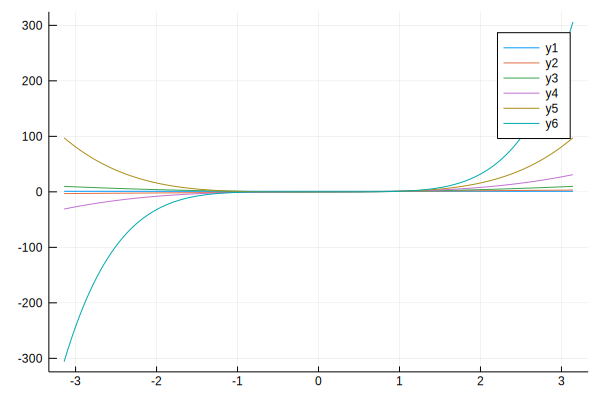

In [47]:
p1 = plot()

for v in V
    plot!(p1, x, v)
end

plot(p1)

In [48]:
rank(V_) 

6

The above cell tells us that these polynomials are linearly independent and hence are a basis. However, they are not orthonormal as can be seen by the following cell.

In [49]:
V_'*V_

6×6 Array{Float64,2}:
  1000.0             -1.13687e-13  …  19559.9           1.45519e-11
    -1.13687e-13   3296.45                1.45519e-11   1.38167e5  
  3296.45            -2.27374e-12         1.38167e5     1.74623e-10
    -1.81899e-12  19559.9                 1.74623e-10   1.06274e6  
 19559.9              1.45519e-11         1.06274e6    -1.16415e-9 
     1.45519e-11      1.38167e5    …     -1.16415e-9    8.59891e6  

A natural choice of coefficients for representing the sinusoid is the Taylor series coefficients:

In [50]:
b_Taylor = [0, 1, 0, -1/factorial(3), 0, 1/factorial(5)]

6-element Array{Float64,1}:
  0.0                 
  1.0                 
  0.0                 
 -0.16666666666666666 
  0.0                 
  0.008333333333333333

In [51]:
y_Taylor = V_*b_Taylor;

In [52]:
y = sin.(x);

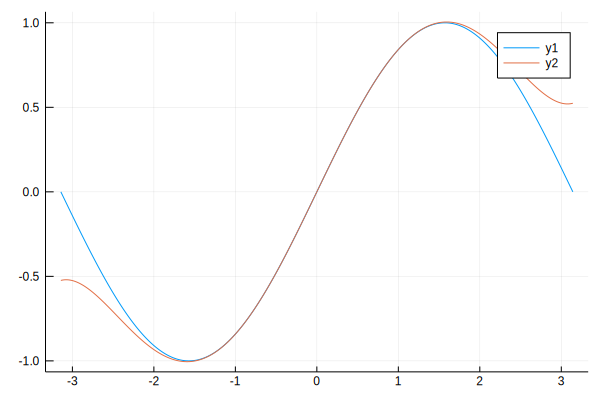

In [53]:
plot(x,y)
plot!(x, y_Taylor)

In [54]:
norm(y - y_Taylor)

4.375951363292458

From the plot, you can see that the approximation gets considerably worse away from zero. There's no reason to believe that a truncated Taylor series is the best approximation on this interval. Instead, we will compute the closest degree 5 polynomial approximation in the sense of Euclidean distance by projecting ```y``` onto the span of ```V``` which is the 6-dimensional space of degree 5 polynomials. 

Exercise: Compute an orthonormal basis for the span of the columns of ```V``` using your Gram-Schmidt function and store the result in a variable called ```W``` as in the previous exercise. 

In [55]:
# BEGIN SOLUTION
W = GramSchmidt(V);

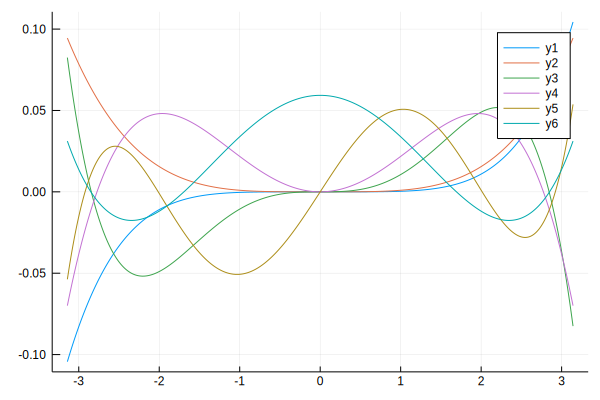

In [56]:
p2 = plot()

for w in W
    plot!(p2, x, w)
end

plot(p2)

Exercise: Compute the projection of ```y``` onto the span of the columns of ```V``` and store the projection in a variable called ```y_hat```. Store the representation in the orthonormal basis (projection coefficients) in a variable called ```a```.

In [57]:
# BEGIN SOLUTION
W = toMatrix(W)
y_hat = W*W'*y
a = W'*y;
W = toVecOfVecs(W)


6-element Array{Array{Float64,1},1}:
 [-0.10435848476928633, -0.10331802962732939, -0.10228588976119059, -0.10126201522947412, -0.10024635629115071, -0.0992388634051542, -0.09823948722997967, -0.09724817862327986, -0.09626488864146295, -0.09528956853928981  …  0.09528956853928981, 0.09626488864146289, 0.09724817862327993, 0.09823948722997967, 0.0992388634051542, 0.10024635629115071, 0.10126201522947412, 0.10228588976119059, 0.10331802962732946, 0.10435848476928633]               
 [0.09448999225530791, 0.09373558491154585, 0.09298570399671285, 0.09224033136883965, 0.09149944892238666, 0.09076303858824375, 0.09003108233373076, 0.0893035621625969, 0.08858046011502115, 0.08786175826761225  …  0.08786175826761225, 0.08858046011502108, 0.08930356216259694, 0.09003108233373076, 0.09076303858824375, 0.09149944892238666, 0.09224033136883962, 0.09298570399671285, 0.09373558491154588, 0.09448999225530791]                        
 [0.08250239390456517, 0.0801873465498338, 0.07789977384457211, 0.0

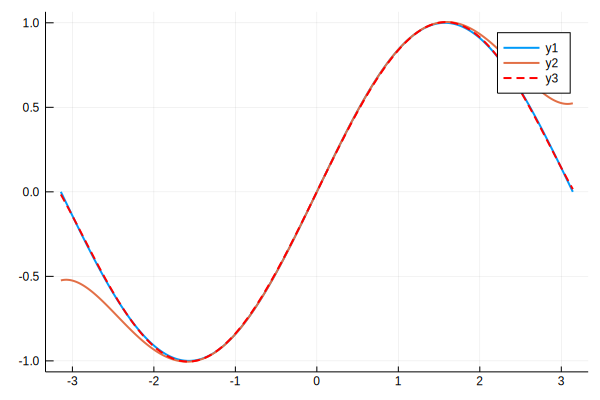

In [58]:
plot(x,y,linewidth=2)
plot!(x, y_Taylor,linewidth=2)
plot!(x, y_hat, linestyle=:dash, linewidth=2, linecolor=:red)

In [59]:
norm(y - y_hat)

0.13683894259003782

Answer check:

In [60]:
y_hat_ref = projGeneral(y, V);

In [61]:
norm(y_hat-y_hat_ref)

4.338300201326135e-14

In [62]:
@assert norm(y_hat_ref-y_hat) < 10^-7

You can see that this approximation via projection is considerably better and almost indistinguishable from sine, at least visually. 

We would like to obtain the representation of the projection in terms of the original non-orthogonal basis $\mathbf V$. You won't have to write any code in this last bit of Part 1, but you should understand all the code I've provided because you'll need to do the same thing yourself later. 

We seek a matrix $\mathbf B$ such that $\mathbf V \mathbf B = \mathbf W$. Let $\mathbf{w_i}$ be the $i^\textrm{th}$ column of $\mathbf W$ and $\mathbf{b_i}$ be the $i^\textrm{th}$ column of $\mathbf B$. To obtain $\mathbf{b_i}$, we solve $\mathbf V\mathbf{b_i} = \mathbf{w_i}$ for $\mathbf{b_i}$. We know that this system has a solution because both $\mathbf V$ and $\mathbf W$ have columns forming a basis for the same space.

To solve a system $\mathbf M\mathbf u = \mathbf v$ numerically for $\mathbf u$, we use ```u = M\v```

In [63]:
B = [V_\w for w in W];
B_ = toMatrix(B)

6×6 Array{Float64,2}:
  5.38218e-20  -3.41356e-19   1.24145e-18  …  -8.16926e-18   0.0592928  
 -2.47059e-19   4.19701e-19   6.35849e-18      0.0762006    -2.66083e-17
 -7.31128e-20   5.02679e-19  -1.80335e-18      2.13046e-17  -0.0279798  
  1.53567e-19  -2.20265e-19   0.0121064       -0.0277394     7.83289e-18
  1.1431e-20    0.000970033   4.37067e-19     -2.90806e-18   0.00254637 
  0.000341019   1.5258e-19   -0.00149623   …   0.00220393   -3.63329e-19

In [64]:
W_ = toMatrix(W)
sum(V_*B_ - W_) # Should be tiny

2.0104905615920388e-15

In [65]:
y_hat = W_*a;

In [66]:
y_hat_2 = V_*B_*a; # Should be the same as y_hat

In [67]:
norm(y_hat_2 - y_hat) # Should be tiny

5.729348183004356e-14

Since the projection onto our subspace can be obtained as $\mathbf W \mathbf a = \mathbf V \mathbf B \mathbf a$, the coefficients corresponding to the representation in terms of the non-orthogonal basis $\mathbf V$ are given by $\mathbf b = \mathbf B \mathbf a$

In [68]:
a

6-element Array{Float64,1}:
  6.819240026774798     
 -3.343950550488417e-16 
 16.880089163686343     
 -3.944761184371259e-15 
 12.9630949385948       
 -2.2420487775370868e-15

In [69]:
b_opt = B_*a

6-element Array{Float64,1}:
 -2.1751356554189317e-16
  0.9877956920902796    
  2.0924557875045587e-16
 -0.15523104437649854   
 -2.3440496544530197e-17
  0.005638621981537535  

You can verify that the coefficients above correspond to the approximation $\hat{y} = 0.987862x − 0.155271x^3 + 0.00564312x^5$

In [70]:
b_Taylor

6-element Array{Float64,1}:
  0.0                 
  1.0                 
  0.0                 
 -0.16666666666666666 
  0.0                 
  0.008333333333333333

In [71]:
b_opt_ref = [0, 0.987862, 0, -0.155271, 0, 0.00564312];

In [72]:
norm(b_opt-b_opt_ref) < 10^-4

true

In [73]:
@assert norm(b_opt-b_opt_ref) < 10^-4

Let's compare the error to the original choice of Taylor series coefficients

In [74]:
norm(y - V_*b_Taylor)

4.375951363292458

In [75]:
norm(y - V_*b_opt) 

0.13683894259003768

In [76]:
@assert norm(y - V_*b_opt) < 0.15

Exercise: Both representations ```a``` and ```b``` should have half of their entries as zero (close to zero). Why is this case? (Hint: Look at the plots of the two bases)

Answer: In the bases plot, half the y-axis values within the region range has a summed value of zero (when you add all the basis vectors y1,y2,..,y6 in the graph). All the bases have a value of zero near the range -1 to 1, thus it makes sense for the orthonormal basis to also have values of zero (or near zero) for half of their entries since the basis should be equivalent. 

# Part 3: Projections versus Taylor Swift

In this part, we project Google Trends data on the popularity of Taylor Swift onto a basis of bump functions (https://en.wikipedia.org/wiki/Bump_function).

We start by loading the data which consists of year-months and a popularity score normalized to lie between 0 and 100

In [77]:
TS = readdlm("TaylorSwift.csv", ',', '\n');

In [78]:
Times = TS[:,1]; # We store the dates in this variable

In [79]:
y = TS[:,2]
y = convert(Array{Float64,1}, y) # We store the popularity vector in this variable

155-element Array{Float64,1}:
  5.0
  5.0
  5.0
  5.0
  5.0
  6.0
  7.0
  7.0
  7.0
  6.0
  6.0
  7.0
 10.0
  ⋮  
 22.0
 16.0
 16.0
 18.0
 14.0
 14.0
 23.0
 22.0
 24.0
 24.0
 35.0
 23.0

Each point in the vector ```y``` contains a popularity score from 0 to 100 and the indices of the components of the vector correspond to month numbers starting from November 2006 and ending at September 2019

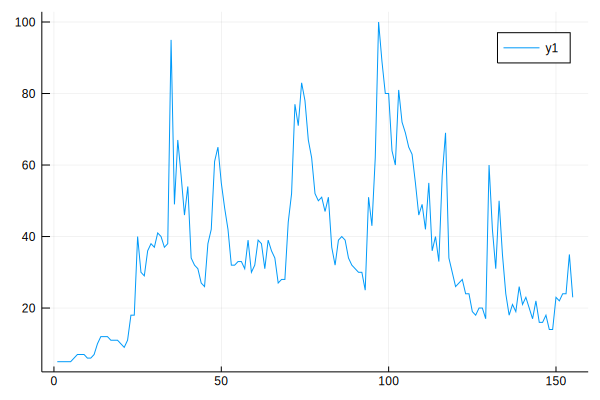

In [80]:
x = [i for i in 1:length(y)]
plot(x,y)

We define the bump function provided here https://en.wikipedia.org/wiki/Bump_function along with a scalling factor $\alpha$. Larger $\alpha$ makes the bump narrower and smaller $\alpha$ makes it wider.

\begin{equation}
f_{\alpha}(x) = \left\{
\begin{array}{ll}
      \exp\left(-\frac{1}{1-(\alpha x)^2}\right)& \textrm{for}\quad |\alpha x| < 1 \\
      0 & \textrm{otherwise}\\
\end{array} 
\right.
\end{equation}

In [81]:
f(x, α) = abs(α*x) < 1 ? exp(-1.0/(1.0-(α*x)^2)) : 0 # This is fancy syntax for an if-else statement

f (generic function with 1 method)

We would like to convert this data set into just yearly data summarizing the popularity Taylor Swift from the years 2007 to 2018.

We will find a low-dimensional representation of this 155-dimensional vector of data by crudely modelling her popularity as a superposition of shifted bump functions where the bumps peak every November when she releases an album. This appears to be the case according to https://en.wikipedia.org/wiki/Taylor_Swift_discography.

We construct an orthonormal basis of 12 bump functions in the following cells and plot them. Their peaks occur every November.

In [82]:
V = Array{Float64,1}[]

N = 12

α = 0.18

for i = 1:N
    basis_vector = f.(x .- (1+12*i), α)
    basis_vector = basis_vector./norm(basis_vector)
    push!(V, basis_vector)
end

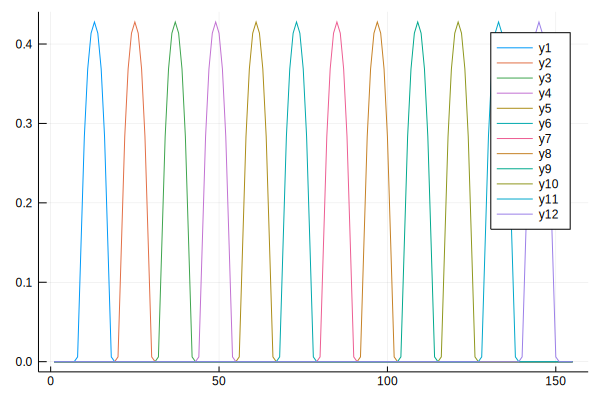

In [83]:
p3 = plot()

for v in V
    plot!(p3, x, v)
end

plot(p3)

The following vector contains the dates corresponding to the indices at which the bump basis functions are centered.

In [84]:
Times_of_basis_vecs = [Times[1+12*i] for i = 1:N]

12-element Array{SubString{String},1}:
 "2007-11"
 "2008-11"
 "2009-11"
 "2010-11"
 "2011-11"
 "2012-11"
 "2013-11"
 "2014-11"
 "2015-11"
 "2016-11"
 "2017-11"
 "2018-11"

Exercise: Compute the projection of ```y``` onto the span of the columns of ```V``` and store the projection in a variable called ```y_hat```. Store the representation in the orthonormal basis (projection coefficients) in a variable called ```a```. Note that $\mathbf V$ is already an orthonormal basis so you don't need to use your Gram-Schmidt. You can verify the orthonormality of our basis using checks like those we did in Part 0.

In [85]:
# BEGIN SOLUTION

V_ = toMatrix(V)
a = V_'*y;
y_hat = V_*V_'*y


155-element Array{Float64,1}:
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.16019159912892542
  3.878161685591172  
  7.539390646991027  
  9.804840088105246  
 11.004324126899919  
 11.379041621553291  
  ⋮                  
 20.994287368955202  
 21.70918150277095   
 20.994287368955202  
 18.70588579930564   
 14.38381239996551   
  7.398840669509593  
  0.30561699450346635
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                

Plot the projection by running the following code:

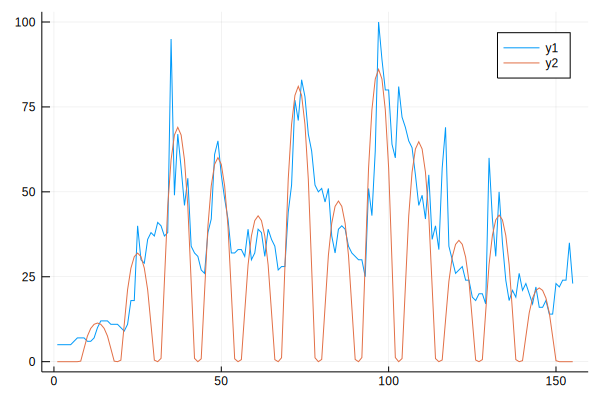

In [86]:
plot(x,y)
plot!(x,y_hat)

In [87]:
norm(y-y_hat) # This should be pretty bad

270.1886245435591

The following code will normalize the low-dimensional representation ```a``` so that the entries lie between 0 and 100 and will then print entries and the corresponding dates sorted by the magnitudes of the entries. 

In [88]:
a = a./maximum(a)*100;

In [89]:
for i in sortperm(a, rev=true)
    println("Date: $(Times_of_basis_vecs[i])  Popularity: $(a[i])")
end

Date: 2014-11  Popularity: 100.0
Date: 2012-11  Popularity: 94.19309940106744
Date: 2009-11  Popularity: 80.1796226588652
Date: 2015-11  Popularity: 75.23687594743443
Date: 2010-11  Popularity: 69.79749750922953
Date: 2013-11  Popularity: 54.954940507637495
Date: 2017-11  Popularity: 50.14298877962035
Date: 2011-11  Popularity: 49.895934114865454
Date: 2016-11  Popularity: 41.50186735594133
Date: 2008-11  Popularity: 37.1460876809347
Date: 2018-11  Popularity: 25.225705246053842
Date: 2007-11  Popularity: 13.222255748851868


From Billboard charts (https://www.billboard.com/music/taylor-swift/chart-history/hot-100), we can see that Taylor Swift's number 1 and number 2 hits between 2007 and 2018 which is range covered by our bump function peaks, occured in the years 2014, 2015, 2012, 2017, 2009, 2013, 2010.

These years should coincide with the top 7 years according to our projection coefficients.

However, perhaps a naive approach might have gotten us the same results, let's check.

Here, we obtain a low-dimensional representation by simply picking out the data points for November and ignoring the remaining data.

In [90]:
a_naive = y[[1+12*i for i = 1:N]]; 
for i in sortperm(a_naive, rev=true)
    println("Date: $(Times_of_basis_vecs[i])  Popularity: $(a_naive[i])")
end

Date: 2014-11  Popularity: 100.0
Date: 2012-11  Popularity: 71.0
Date: 2009-11  Popularity: 67.0
Date: 2010-11  Popularity: 65.0
Date: 2017-11  Popularity: 50.0
Date: 2015-11  Popularity: 46.0
Date: 2008-11  Popularity: 40.0
Date: 2011-11  Popularity: 39.0
Date: 2013-11  Popularity: 39.0
Date: 2016-11  Popularity: 27.0
Date: 2018-11  Popularity: 16.0
Date: 2007-11  Popularity: 10.0


Exercise: This approach seems to "wrongly" squeeze 2008 into the top 7. Examining the plotted data and projection, why might this be the case?

Answer: 

Looking at the projection, it seems that the bump that corresponds to 2008, represented by the second row has one of the smaller contributions to the projection with a value of less than 75. Furthermore, by the plotted data, it seems that in 2008 there was not a peak in popularity but more so that 2008 appears to be part of the popularity build that led to the peak in 2009 since her popularity only decreased slightly after the Nov 2008 peak and shot right back up. Because of this, 2008 seems to be "wrongly" popular

Here, we consider taking the average of the data points in the 6 months before and after every November as the popularity for the month of November for any particular year. This way, we don't ignore the data within the years.

In [91]:
a_less_naive = y[1+6:144+6]
a_less_naive = reshape(a_less_naive,(12,12))
a_less_naive = sum(a_less_naive, dims = 1)/12
a_less_naive = a_less_naive[:]
a_less_naive = a_less_naive./maximum(a_less_naive)*100
for i in sortperm(a_less_naive)
    println("Date: $(Times_of_basis_vecs[i])  Popularity: $(a_less_naive[i])")
end

Date: 2007-11  Popularity: 15.126050420168067
Date: 2018-11  Popularity: 32.212885154061624
Date: 2008-11  Popularity: 40.19607843137255
Date: 2017-11  Popularity: 50.0
Date: 2016-11  Popularity: 54.48179271708683
Date: 2011-11  Popularity: 58.123249299719895
Date: 2013-11  Popularity: 67.64705882352942
Date: 2010-11  Popularity: 69.88795518207283
Date: 2009-11  Popularity: 82.6330532212885
Date: 2012-11  Popularity: 93.69747899159664
Date: 2015-11  Popularity: 94.2577030812325
Date: 2014-11  Popularity: 100.0


Exercise: These approach seems to overemphasize 2011 and puts it into the top 7. Examining the plotted data and projection again, why might this be the case?

Answer: Although there was not a peak in 2011, her popularity was around the same level throughout the year, so by averaging out the neighbouring 6 months of data, while other years decrease their popularity score due to the lows after peaks, 2011 increased its score since the peak value was for the most part maintained. 

Now, we try to construct a better basis for representing the Taylor Swift data.

The following code defines a 24-dimensional non-orthonormal basis which squeezes in bump functions to lie between our previous bump functions.

In [92]:
V = Array{Float64,1}[]

N = 12

ϵ = -0.1

α = 0.24

β = 0.24 + ϵ

for i = 1:N
    basis_vector = f.(x .- (1+12*i), α)
    basis_vector = basis_vector./norm(basis_vector)
    push!(V, basis_vector)
end

for i = 1:N
    basis_vector = f.(x .- (1+6+12*i), β)
    basis_vector = basis_vector./norm(basis_vector)
    push!(V, basis_vector)
end

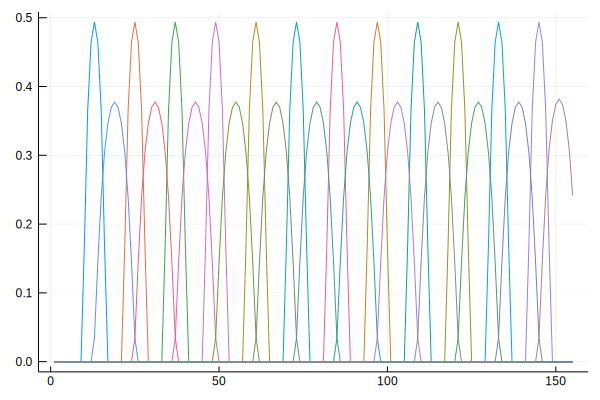

In [93]:
p4 = plot()

for v in V
    plot!(p4, x, v)
end

plot(p4,legend=false)

Since the bump functions overlap, we cannot guarantee that they are orthogonal. They may or may not be orthogonal. We can check. 

In [94]:
V_ = toMatrix(V);
V_'*V_

24×24 Array{Float64,2}:
 1.0       0.0       0.0       …  0.0         0.0         0.0       
 0.0       1.0       0.0          0.0         0.0         0.0       
 0.0       0.0       1.0          0.0         0.0         0.0       
 0.0       0.0       0.0          0.0         0.0         0.0       
 0.0       0.0       0.0          0.0         0.0         0.0       
 0.0       0.0       0.0       …  0.0         0.0         0.0       
 0.0       0.0       0.0          0.0         0.0         0.0       
 0.0       0.0       0.0          0.0         0.0         0.0       
 0.0       0.0       0.0          0.0         0.0         0.0       
 0.0       0.0       0.0          0.222748    0.0         0.0       
 0.0       0.0       0.0       …  0.222748    0.222748    0.0       
 0.0       0.0       0.0          0.0         0.222748    0.225241  
 0.222748  0.222748  0.0          0.0         0.0         0.0       
 0.0       0.222748  0.222748     0.0         0.0         0.0       
 0.0      

The above matrix is not identity, so they aren't orthonormal.

Exercise: Compute the projection of ```y``` onto the span of the columns of ```V``` and store the projection in a variable called ```y_hat```. Note that you will need to obtain an orthonormal basis first this time.

In [95]:
# BEGIN SOLUTION
W = GramSchmidt(V)
W_ = toMatrix(W)
y_hat = W_*W_'*y


155-element Array{Float64,1}:
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  6.765874147135442e-5
  2.9377855554764967  
  6.389728286923921   
  8.1087806223547     
  9.533440416317578   
  ⋮                   
 16.042246590609448   
 12.954610302840603   
 17.623862466989188   
 21.867230544993834   
 22.46548848225252    
 22.089908366694033   
 23.575199537198785   
 24.05125390178585    
 23.575199537198785   
 22.08983809424877    
 19.414214246659306   
 15.23066265187891    

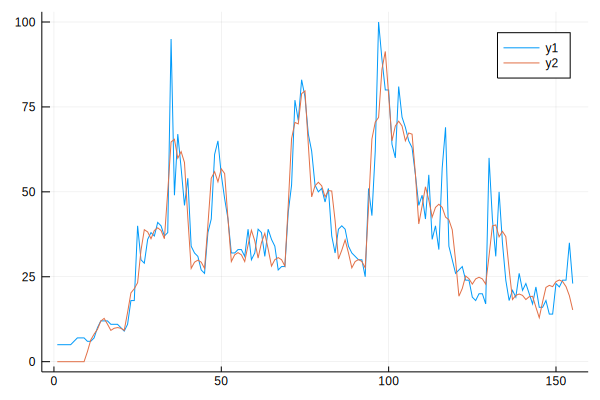

In [96]:
plot(x,y)
plot!(x,y_hat)

In [97]:
norm(y-y_hat)

97.6896606229551

Exercise: Change the value of $\epsilon$ in the cell which constructs the basis to a nonzero (possibly negative) value and re-compute the projection. Try to find an $\epsilon$ to reduce the error to less than 110. Once you've found a choice for this value, explain why you think it's better than $\epsilon = 0$ or $\epsilon$ of a different sign.

Answer:The value of epsilon is a weight for how much you way november in comparison to other months. A negative episilon means you weight november more than the other months which is when her hits come out and she is most popular. 

In [98]:
@assert norm(y-y_hat) < 110

Later in the course, you will learn how to obtain an "optimal" basis to project onto to obtain the best K-dimensional approximation of your data if that is what you're interested in rather than designing the basis based on our intuition as we did here. 

However, sometimes, we'd prefer to construct our basis and subspace ourselves so that we can interpret its meaning. 

# Part 4: Projecting music onto a basis of notes

In this part, we consider the problem of identifying the notes in a recording of a musical chord. A chord is a bunch of notes played at once. We have recordings of three chords played on the piano each consisting of three notes played simultaneously. The ```.ogg``` files are audio files which you can listen to and the ```.csv``` files are data files containing the time-domain waveform of the sound. 

We start by loading the data:

In [99]:
Chord = readdlm("Chord_3.csv"); # You will later have to change this to Chord_2.csv, then Chord_3.csv

In [100]:
y = Chord[:] # This is a time-domain waveform vector

7000-element Array{Float64,1}:
 -0.041237  
 -0.011382  
 -0.018652  
  0.018559  
 -0.0024913 
  0.0035123 
  0.01588   
 -0.035402  
 -0.031435  
 -0.0028256 
  0.0019371 
  0.0057359 
  0.02392   
  ⋮         
  0.0025924 
  0.0022738 
  0.00060905
 -0.00053882
 -0.0022884 
 -0.0033305 
 -8.7641e-6 
 -0.00047409
 -0.0015122 
 -0.00045022
 -0.00083816
 -0.00017074

The following defines a time axis vector. The components of ```y``` are samples of the waveform that are 1/4410 seconds apart.

In [101]:
t = [i for i in 1:length(y)].*1/4410;

The following is a plot of the waveform:

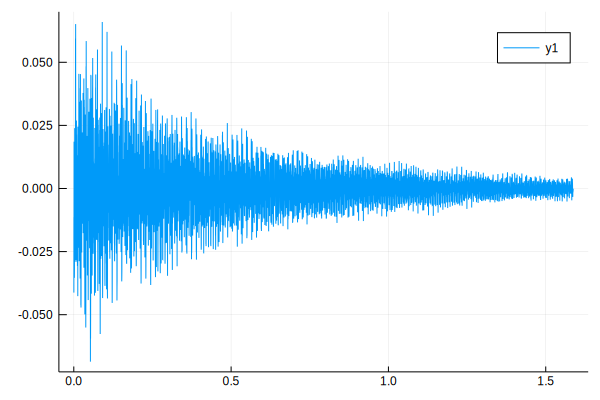

In [102]:
plot(t,y)

The chords played are restricted to a particular set of notes on the piano and our chords will consist of three notes played together. We construct a non-orthogonal basis for a 7-dimensional subspace of the 7000-dimensional space in which the recording of the chord lies. This basis is chosen to consist of cosine functions whose frequencies are those of the the notes on the piano we are restricted to. 

Note that this is far from a sufficient choice of basis for accurate representation of our recording. A projection onto this basis will produce something that sounds like a synthesizer. It cannot capture variations in volume. Moreover, if it sufficed to represent the sound this way, then you wouldn't be able to tell the difference between the sound of a guitar and the sound of a piano, or the human voice or any instrument. 

Nonetheless, the coefficients of the representation in this basis will be enough to tell us which 3 of the the 7 possible notes are being played. 

In [103]:
C4 = cos.(2*π*261.626*t)
D4 = cos.(2*π*293.665*t)
E4 = cos.(2*π*329.628*t)
F4 = cos.(2*π*349.228*t)
G4 = cos.(2*π*391.995*t)
A4 = cos.(2*π*440.000*t)
B4 = cos.(2*π*493.883*t);

A note on the frequencies: Two consecutive notes on the piano differ by factor of $2^{1/12}$. Here, we have the frequencies of what's called a C major scale where some notes are skipped so that the difference between two consecutive notes is a factor of factor of $2^{1/12}$ or $2^{2/12}$. For the C major scale, the notes that are skipped coincide with the 5 black keys, so these notes correspond to the 7 unique white keys on the piano which are repeated. The reference frequency is that of A4 from which all others are computed. 440 Hz is called the standard concert pitch. 

Moreover, the next note in this sequence is C5 which will have a frequency which is double that of C4 making it orthogonal to it since sinusoids of frequencies that are integer multiples of the same frequency are orthogonal. However, we stop short of C5, so all of the sinusoids here are not orthogonal. They are, however, linearly independent. 

In [104]:
Basis_vec_names = ["C4", "D4", "E4", "F4", "G4", "A4", "B4"]

7-element Array{String,1}:
 "C4"
 "D4"
 "E4"
 "F4"
 "G4"
 "A4"
 "B4"

In [105]:
V = [C4, D4, E4, F4, G4, A4, B4];

Note that the following plot is "zoomed in", i.e., the x axis range is limited, else it would just look like a blob because the period of the sinusoids is small compared to their duration

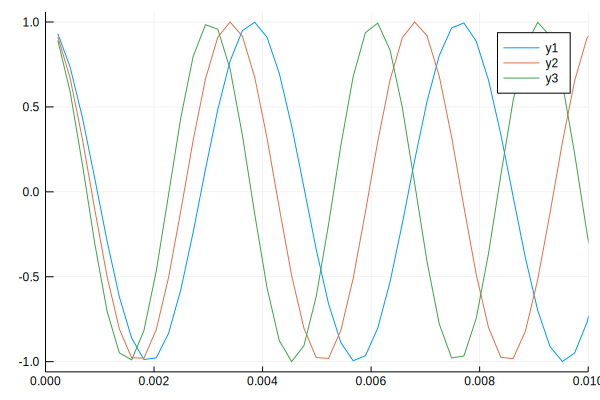

In [106]:
plot(t,V[1],xlim=(0,0.01))
plot!(t,V[2])
plot!(t,V[3])

Exercise: Compute the representation of the projection of ```y``` onto the span of ```V``` and store the representation of the projection in terms of ```V``` in a vector called ```b```. Note that you will need to do the same thing we did to obtain the approximation of the sine function in Part 2 where we obtained a change of basis matrix to convert the representation in terms of the orthonormal basis to one in terms of the non-orthogonal basis ```V```. You can copy and paste code from there. Also, store your projection in a variable called ```y_hat```.

In [107]:
# BEGIN SOLUTION
W = GramSchmidt(V)
W_ = toMatrix(W)

a = W_'*y
V_ = toMatrix(V)

B = [V_\w for w in W]
B_ = toMatrix(B)


y_hat = W_*a
y_hat_2 = V_*B_*a
# println(norm(y_hat-y_hat_2))
b = B_*a









7-element Array{Float64,1}:
 -0.004299769271054895 
 -1.8979227207999277e-5
  0.002758260068634916 
  7.462786334749688e-5 
 -0.0014289496448866622
 -3.853696495728839e-5 
 -5.542698138238869e-6 

Exercise: By running the two code cells below which print the components of ```b``` sorted by magnitude, identify the three notes of each chord and enter your answers below. You will have to change the file name in the cell which loads the data and re-run your code for each file. I.e., you should identify the 3 notes of the three chords and list 9 notes in total below. 

Answer

Three notes of Chord_1: C, E, A

Three notes of Chord_2: F, D, A

Three notes of Chord_3: C, E, G

In [108]:
b = abs.(b)

7-element Array{Float64,1}:
 0.004299769271054895 
 1.8979227207999277e-5
 0.002758260068634916 
 7.462786334749688e-5 
 0.0014289496448866622
 3.853696495728839e-5 
 5.542698138238869e-6 

In [109]:
for i in sortperm(b,rev=true)
    println("Note: $(Basis_vec_names[i]) Coeff.: $(b[i])")
end

Note: C4 Coeff.: 0.004299769271054895
Note: E4 Coeff.: 0.002758260068634916
Note: G4 Coeff.: 0.0014289496448866622
Note: F4 Coeff.: 7.462786334749688e-5
Note: A4 Coeff.: 3.853696495728839e-5
Note: D4 Coeff.: 1.8979227207999277e-5
Note: B4 Coeff.: 5.542698138238869e-6


If you would like to verify your answers and you trust your music skills more than you trust your code, you can try to play the chord here https://www.apronus.com/music/flashpiano.htm. Choose the setting "computer keyboard plays from C4 to C6" and play the chord with your computer keyboard and then listen to the corresponding audio file and compare. 

Exercise: You can run the code cell below to plot the ```y``` and the projection ```y_hat``` over an interval of 0.1 seconds. From this plot, you can see that the projection is a bad approximation of the original signal. Why could we expect this method of identifying the notes to still work? Write your answer in the Markdown cell after the plot.

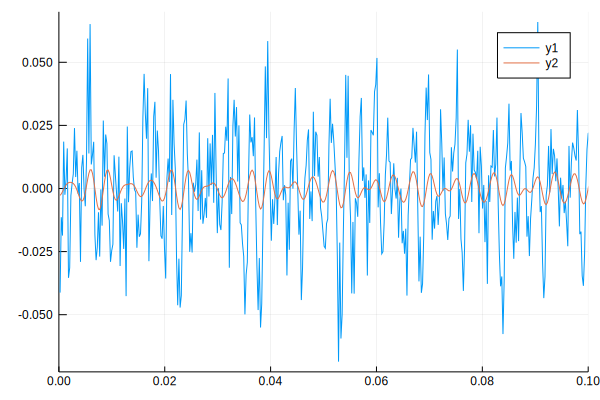

In [110]:
plot(t,y, xlim=(0,0.1))
plot!(t,y_hat)

Answer: The original signal is very noisy, where as the projection is smooth so it makes sense that the approximation does not look too similar. However, it can be seen that while the projection does not lie directly on the original signal, the upward and downward peaks and the general shape and direction of the signal is maintained. Thus, while the magnitude does not exactly match up, a correct pattern/shape should still be detectable for decently accurate chord predictions. 

------------------